# Project: Investigate a Dataset - [No-shw appointment]

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

# Introduction

## Dataset Description


This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

- Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.

- There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.

- The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.


## Question(s) for Analysis

What factors are important to predict show up:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as snb
get_ipython().run_line_magic('matplotlib', 'inline')

In [5]:
# Upgrade pandas to use dataframe.explode() function. 
# get_ipython().system('pip install --upgrade pandas==0.25.0')

<a id='wrangling'></a>

## Data Wrangling

### General Properties

In [6]:
#

In [7]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
from load_data_investigate import load_data
num = 1
string = ""
df = load_data(num, string = string)
'''{0:"titanic", 1: "medical", 2: "movies", 3: "gun",
 4: "bike", 5: "citibike", 6: "flights", 7: "footie", 8:"movie_5000}
    string = year for bike
             Yes for footie data frames, else returns connection to database. df.keys() returns dataframe keys
             Yes for movie_5000, return a list of dataframes including credits 

'''
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.shape

(110527, 14)

Our data is consists of 110527 rows and 14 columns

In [9]:
# Is there duplication
df.duplicated().sum()

0

No dumlicated rows

In [10]:
# Is there missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing data

In [11]:
# Show data description 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* Mean age is 37
* Max age is 115
* Min age is -19(will be removed)

In [12]:
# Identifying row of value of -1
mask = df.query('Age=="-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


There is only one row of wrong value which is -1

### Data Cleaning

In [13]:
# Removing wrong value of -1
df.drop(df.index[99832], axis=0, inplace=True)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [14]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
# Removing duplicated IDs with duplicated showing status
df.drop_duplicates(['PatientId', 'No-show'], inplace = True)
df.shape

(71816, 14)

In [16]:
# Removing data which will not affect the process of analysis
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)
df.head(5)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data wrangling summary:

First we showed the dimension of our CSV file , then check if there was duplication appointment. Then if there was duplicated patients ID and remove them. Then we checked if there was missing data. Then getting some useful statistics such as min, max, measn ..etc. 

<a id='eda'></a>

## Exploratory Data Analysis


Now we're ready to do some computational statistics and create visualization to our data.


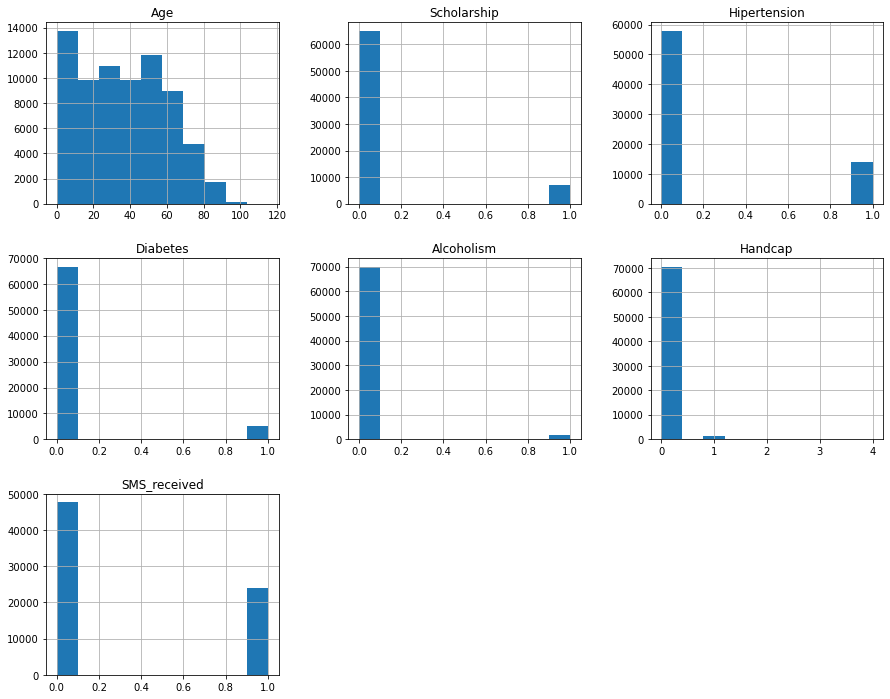

In [17]:
# General view on data
df.hist(figsize=(15, 12));

In [18]:
df.rename(columns={'No-show':'No_show'}, inplace=True)
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)

In [19]:
show = df.No_show == 'No'
noshow = df.No_show == 'Yes'
df[show].count(), df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

Number of those who showed at the clinic is about 4 times wthose who didn't

In [20]:
df[show].mean(), df[noshow].mean()

/var/folders/xj/2spvn73d36j93q5j6c2ly3000000gn/T/ipykernel_25151/351582867.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[show].mean(), df[noshow].mean()


(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

We've to check our SMS campaign.

# Factors on the attendance rate

## Does age affect the attendance?

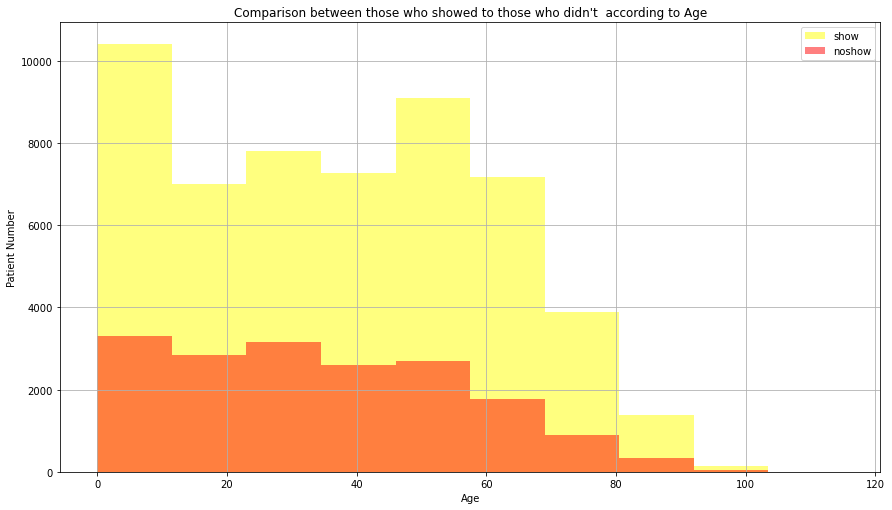

In [21]:
def attendance(df, col_name, attended, absent):
    plt.figure(figsize=[14.7, 8.27])
    df[col_name][show].hist(alpha = 0.5, bins = 10, color = 'yellow', label = 'show')
    df[col_name][noshow].hist(alpha = 0.5, bins = 10, color = 'red', label = 'noshow')
    plt.legend();
    plt.title("Comparison between those who showed to those who didn't  according to Age")
    plt.xlabel("Age")
    plt.ylabel("Patient Number");
attendance(df, 'Age', show, noshow)

ages between 0 and 3 are most showed(because of parents care), from 45:55 the least attendance

## Does age and chronic diseases affect togther

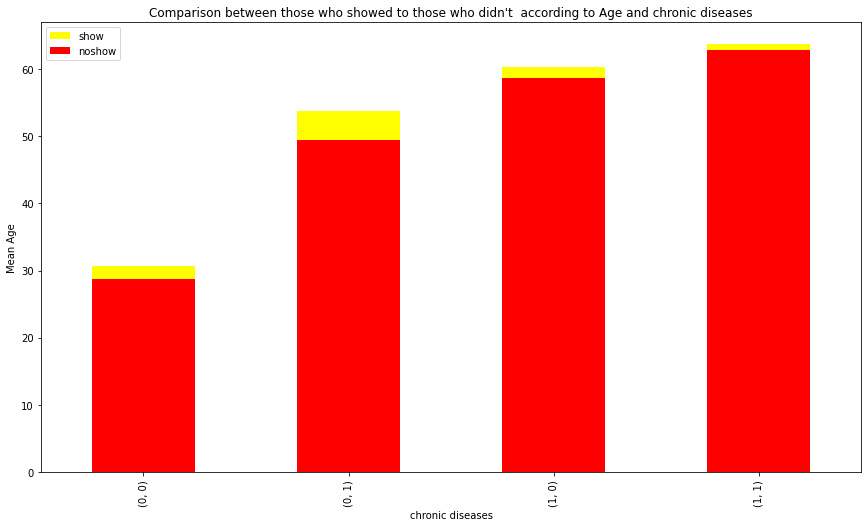

In [22]:
plt.figure(figsize=[14.7, 8.27])
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar', color = 'yellow', label = 'show')
df[noshow].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar', color = 'red', label = 'noshow')
plt.legend();
plt.title("Comparison between those who showed to those who didn't  according to Age and chronic diseases")
plt.xlabel("chronic diseases")
plt.ylabel("Mean Age");

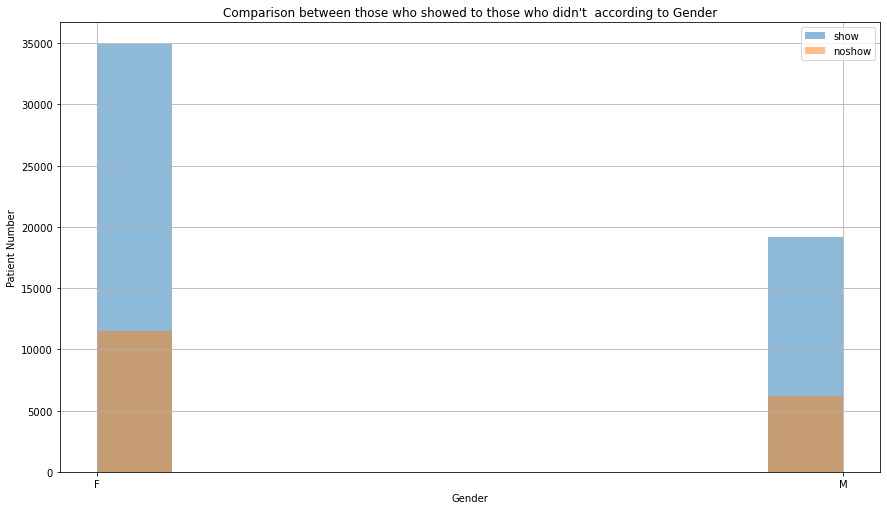

In [23]:
# Compare show showed to who didn't according to their gender
plt.figure(figsize=[14.7, 8.27])
df.Gender[show].hist(alpha = 0.5, label = 'show')
df.Gender[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title("Comparison between those who showed to those who didn't  according to Gender")
plt.xlabel("Gender")
plt.ylabel("Patient Number");

Gender has no clear effect

## Does age and gender affects the attendance?

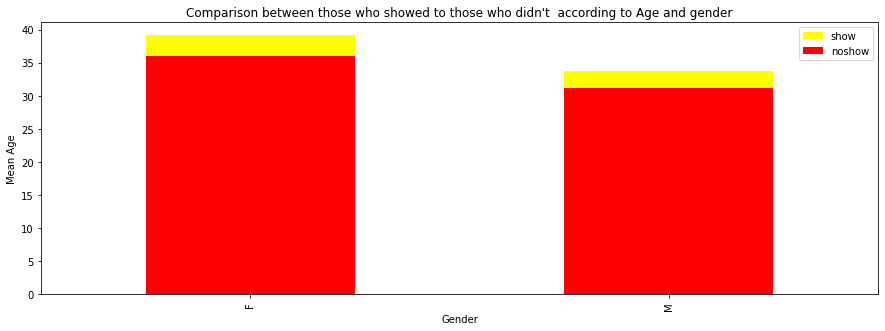

In [24]:
plt.figure(figsize=[15, 5])
df[show].groupby('Gender').Age.mean().plot(kind='bar', color = 'yellow', label = 'show')
df[noshow].groupby('Gender').Age.mean().plot(kind='bar', color = 'red', label = 'noshow')
plt.legend();
plt.title("Comparison between those who showed to those who didn't  according to Age and gender")
plt.xlabel("Gender")
plt.ylabel("Mean Age");

In [25]:
print(df[show].groupby("Gender").Age.mean(), df[noshow].groupby("Gender").Age.mean(),
     df[show].groupby('Gender').Age.median(), df[noshow].groupby("Gender").Age.median())

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39.0
M    32.0
Name: Age, dtype: float64 Gender
F    34.0
M    29.0
Name: Age, dtype: float64


No clear correlation between age & gender affecting show rate

## Does SMS affect the attendance?

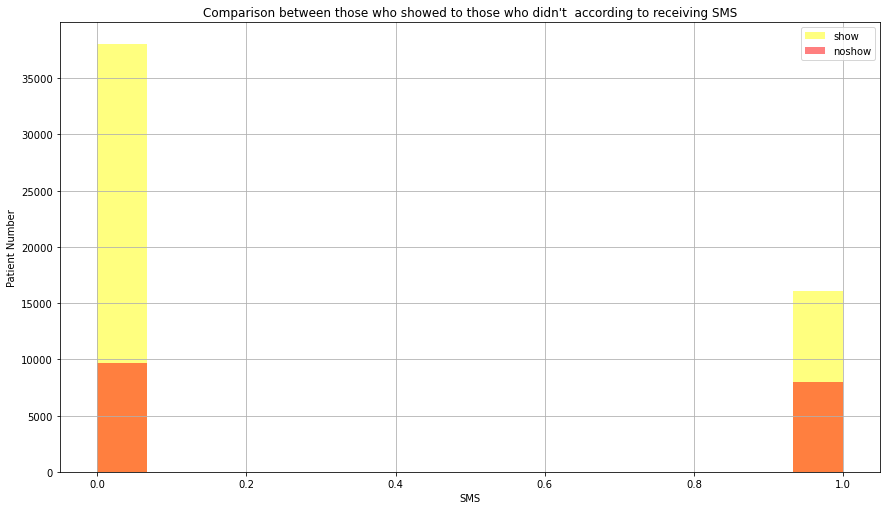

In [26]:
def attendance(df, col_name, attended, absent):
    plt.figure(figsize=[14.7, 8.27])
    df[col_name][show].hist(alpha = 0.5, bins = 15, color = 'yellow', label = 'show');
    df[col_name][noshow].hist(alpha = 0.5, bins = 15, color = 'red', label = 'noshow');
    plt.legend();
    plt.title("Comparison between those who showed to those who didn't  according to receiving SMS")
    plt.xlabel("SMS")
    plt.ylabel("Patient Number");
attendance(df, 'SMS_received', show, noshow)

We must check our SMS campaign.

## Does neighbourhood affect the attendance?

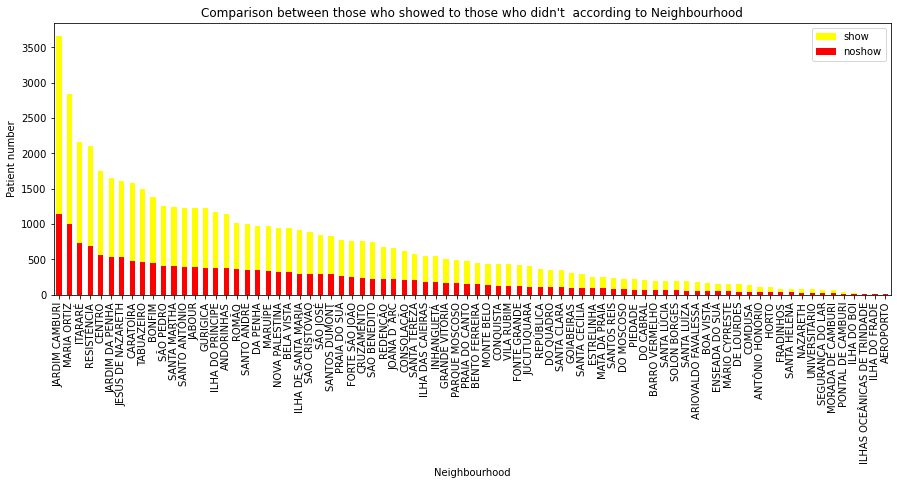

In [27]:
plt.figure(figsize=[15, 5])
df.Neighbourhood[show].value_counts().plot(kind='bar', color = 'yellow', label = 'show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar', color = 'red', label = 'noshow')

plt.legend()
plt.title("Comparison between those who showed to those who didn't  according to Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Patient number");

It turns out that Neighbourhood has a great effect on attendance

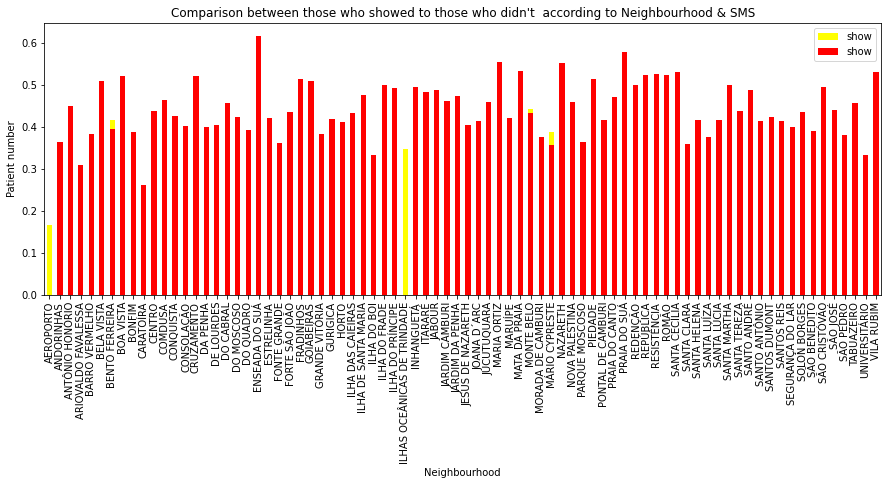

In [28]:
plt.figure(figsize=[15, 5])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color = 'yellow', label = 'show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color = 'red', label = 'show')

plt.legend()
plt.title("Comparison between those who showed to those who didn't  according to Neighbourhood & SMS")
plt.xlabel("Neighbourhood")
plt.ylabel("Patient number");

Only in 5 Neighbourhoods SMShas response.

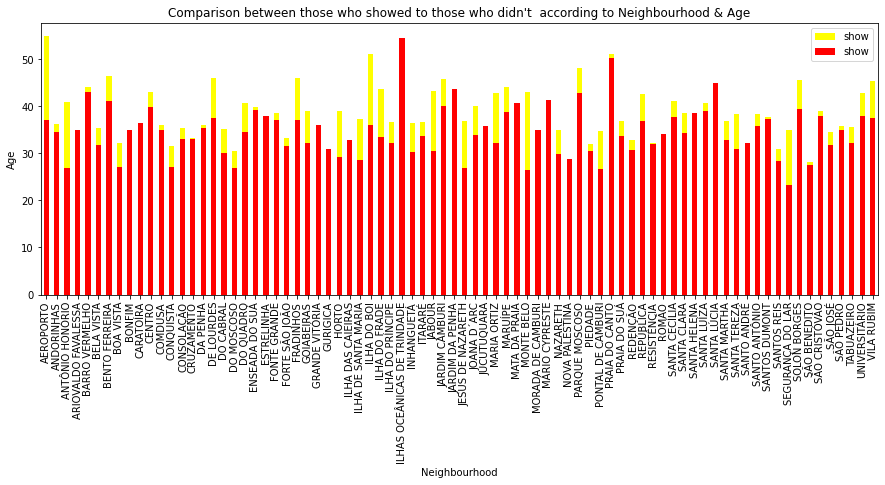

In [29]:
plt.figure(figsize=[15, 5])
df[show].groupby('Neighbourhood').Age.mean().plot(kind='bar', color = 'yellow', label = 'show')
df[noshow].groupby('Neighbourhood').Age.mean().plot(kind='bar', color = 'red', label = 'show')

plt.legend()
plt.title("Comparison between those who showed to those who didn't  according to Neighbourhood & Age")
plt.xlabel("Neighbourhood")
plt.ylabel("Age");

According to ages patients attendance differ.
<a id='conclusions'></a>

## Conclusions

* Number of showing patients from same neighbourhood is affected by SMS in addition to age
* Neighbourhood plays a great role in attendance 
* Number of showing patients without receiving an SMS is greater than who receives SMS, which means SMScampaign wasn't effective or it needs to be changed.


### Limitations


Correlation between parameters(enrollement in the welfare program, gender, chronic diseases) aren't clear enough


In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files


255